# Neural Networks continued

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


## Load MNIST Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

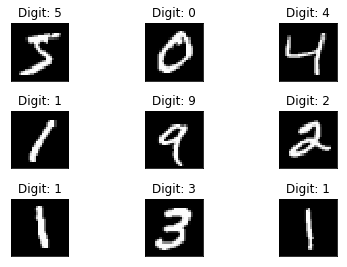

In [3]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

## Preprocessing the data

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

##### Normalization

In [5]:
X_train /= 255
X_test /= 255

##### One hot encoding

In [6]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

## Feedforward Model

##### Reshape Input

In [7]:
X_train_vec = X_train.reshape(60000, 784)
X_test_vec = X_test.reshape(10000, 784)

In [8]:
def myEvaluation(y_pred):
    correct_ind = np.nonzero(y_pred == y_test)[0]
    incorrect_ind = np.nonzero(y_pred != y_test)[0]
    print(len(correct_ind)," classified correctly")
    print(len(incorrect_ind)," classified incorrectly")
    print()
    print(classification_report(y_test, y_pred, digits=4))
    sns.heatmap(confusion_matrix(y_test, y_pred), square=True, annot=True)
    plt.show()

In [9]:
def baseline_model():
    model = Sequential()
    model.add(Dense(784, input_shape=(784,)))
    model.add(Activation('relu'))     
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
ff_model = baseline_model()
ff_model_fitted = ff_model.fit(X_train_vec, Y_train, batch_size=128, epochs=15, verbose=2)

Epoch 1/15
 - 4s - loss: 0.2474 - acc: 0.9294
Epoch 2/15
 - 5s - loss: 0.0985 - acc: 0.9708
Epoch 3/15
 - 5s - loss: 0.0621 - acc: 0.9813
Epoch 4/15
 - 5s - loss: 0.0429 - acc: 0.9872
Epoch 5/15
 - 5s - loss: 0.0322 - acc: 0.9903
Epoch 6/15
 - 5s - loss: 0.0214 - acc: 0.9941
Epoch 7/15
 - 5s - loss: 0.0170 - acc: 0.9952
Epoch 8/15
 - 5s - loss: 0.0129 - acc: 0.9964
Epoch 9/15
 - 5s - loss: 0.0101 - acc: 0.9974
Epoch 10/15
 - 5s - loss: 0.0070 - acc: 0.9984
Epoch 11/15
 - 5s - loss: 0.0090 - acc: 0.9974
Epoch 12/15
 - 5s - loss: 0.0090 - acc: 0.9970
Epoch 13/15
 - 5s - loss: 0.0059 - acc: 0.9985
Epoch 14/15
 - 5s - loss: 0.0024 - acc: 0.9995
Epoch 15/15
 - 5s - loss: 0.0061 - acc: 0.9982


9799  classified correctly
201  classified incorrectly

             precision    recall  f1-score   support

          0     0.9918    0.9816    0.9867       980
          1     0.9758    0.9947    0.9852      1135
          2     0.9683    0.9767    0.9725      1032
          3     0.9909    0.9752    0.9830      1010
          4     0.9877    0.9776    0.9826       982
          5     0.9767    0.9865    0.9816       892
          6     0.9692    0.9843    0.9767       958
          7     0.9749    0.9805    0.9777      1028
          8     0.9884    0.9610    0.9745       974
          9     0.9773    0.9792    0.9782      1009

avg / total     0.9800    0.9799    0.9799     10000



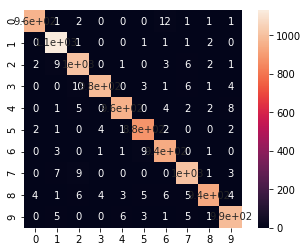

In [11]:
y_ff_pred = ff_model.predict_classes(X_test_vec)
myEvaluation(y_ff_pred)

## Convolutional Model


##### Reshape Input

In [12]:
X_train_cn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [13]:
X_train_cn.shape[1:]

(28, 28, 1)

In [14]:
def conv_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=X_train_cn.shape[1:], padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
cn_model = conv_model()
cn_model_fitted = cn_model.fit(X_train_cn, Y_train, batch_size=128, epochs=8, verbose=2)

Epoch 1/8
 - 11s - loss: 0.2637 - acc: 0.9237
Epoch 2/8
 - 12s - loss: 0.0981 - acc: 0.9708
Epoch 3/8
 - 11s - loss: 0.0709 - acc: 0.9789
Epoch 4/8
 - 11s - loss: 0.0557 - acc: 0.9823
Epoch 5/8
 - 12s - loss: 0.0454 - acc: 0.9859
Epoch 6/8
 - 11s - loss: 0.0395 - acc: 0.9876
Epoch 7/8
 - 12s - loss: 0.0315 - acc: 0.9902
Epoch 8/8
 - 11s - loss: 0.0283 - acc: 0.9913


9868  classified correctly
132  classified incorrectly

             precision    recall  f1-score   support

          0     0.9828    0.9908    0.9868       980
          1     0.9956    0.9903    0.9929      1135
          2     0.9873    0.9826    0.9849      1032
          3     0.9834    0.9960    0.9897      1010
          4     0.9888    0.9929    0.9909       982
          5     0.9877    0.9888    0.9882       892
          6     0.9926    0.9854    0.9890       958
          7     0.9883    0.9854    0.9868      1028
          8     0.9765    0.9825    0.9795       974
          9     0.9840    0.9732    0.9786      1009

avg / total     0.9868    0.9868    0.9868     10000



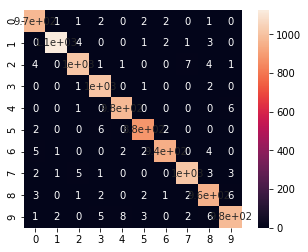

In [16]:
y_cn_pred = cn_model.predict_classes(X_test_cn)
myEvaluation(y_cn_pred)

In [17]:
cn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
_________________________________________________________________


## Recurrent Model


In [18]:
def simpleRnn_model():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(28, 28)))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
simpleRnn = simpleRnn_model()
simpleRnn_fitted = simpleRnn.fit(X_train, Y_train, epochs=8, batch_size=128, verbose=2)

Epoch 1/8
 - 3s - loss: 0.8009 - acc: 0.7496
Epoch 2/8
 - 3s - loss: 0.3591 - acc: 0.8946
Epoch 3/8
 - 3s - loss: 0.2878 - acc: 0.9169
Epoch 4/8
 - 3s - loss: 0.2539 - acc: 0.9262
Epoch 5/8
 - 3s - loss: 0.2255 - acc: 0.9352
Epoch 6/8
 - 3s - loss: 0.2092 - acc: 0.9399
Epoch 7/8
 - 3s - loss: 0.1922 - acc: 0.9454
Epoch 8/8
 - 3s - loss: 0.1849 - acc: 0.9480


9517  classified correctly
483  classified incorrectly

             precision    recall  f1-score   support

          0     0.9628    0.9776    0.9701       980
          1     0.9680    0.9868    0.9773      1135
          2     0.9534    0.9525    0.9530      1032
          3     0.9505    0.9307    0.9405      1010
          4     0.9556    0.9430    0.9493       982
          5     0.9284    0.9305    0.9295       892
          6     0.9428    0.9635    0.9530       958
          7     0.9654    0.9504    0.9578      1028
          8     0.9417    0.9456    0.9436       974
          9     0.9428    0.9306    0.9367      1009

avg / total     0.9517    0.9517    0.9516     10000



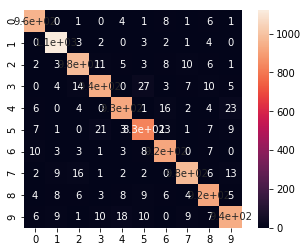

In [22]:
y_rnn_pred = simpleRnn.predict_classes(X_test)
myEvaluation(y_rnn_pred)

In [21]:
simpleRnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                3950      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________
